In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [2]:
data = pd.read_csv('bnbSentimet.csv')

In [3]:
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2018-05-27 00:00:00+00:00,12.785700,12.792300,12.329100,12.605800,36691600,3.533333,-0.022832,0.474136,11.894300,0
1,2018-05-28 00:00:00+00:00,12.599600,12.752800,11.703100,11.894300,33398400,3.433333,-0.060801,0.499136,12.570900,1
2,2018-05-30 00:00:00+00:00,12.608400,12.796900,12.273900,12.570900,43146300,3.466667,-0.060816,0.499136,14.679700,1
3,2018-06-02 00:00:00+00:00,14.319200,14.846000,14.008700,14.679700,87983000,3.466667,-0.060869,0.499136,14.184200,0
4,2018-06-10 00:00:00+00:00,15.928600,15.928600,13.592300,14.184200,79288200,3.533333,-0.000630,0.465802,14.895300,1
...,...,...,...,...,...,...,...,...,...,...,...
289,2024-05-11 00:00:00+00:00,585.622192,594.206543,581.896667,592.027893,1333662111,2.033333,-0.177185,0.554188,582.074341,0
290,2024-05-15 00:00:00+00:00,566.707031,587.421509,561.127258,582.074341,1895100260,2.100000,-0.133190,0.531966,574.631653,0
291,2024-05-19 00:00:00+00:00,580.481567,581.876709,572.369629,574.631653,1298887094,2.133333,-0.100380,0.515299,600.225891,1
292,2024-05-24 00:00:00+00:00,598.670837,604.314880,588.893982,600.225891,1778282198,2.100000,-0.099293,0.515299,593.522339,0


In [4]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5932203389830508
Confusion Matrix:
[[15 12]
 [12 20]]


In [11]:
import pandas as pd

# Read the CSV file
data_from_bnb = pd.read_csv("bnb.csv")

# Get the last row
last_row_bnb = data_from_bnb.iloc[-1]

print("Last row from bnb.csv:")
print(last_row_bnb)

Last row from bnb.csv:
Date            2024-06-03 00:00:00+00:00
Open                           603.020935
High                           634.066345
Low                             601.44873
Close                          626.768494
Volume                         2302817792
Dividends                             0.0
Stock Splits                          0.0
Name: 2398, dtype: object


In [12]:
import pandas as pd

# Read the CSV file
sentiment_from_bnb = pd.read_csv("binance_sentiment.csv")

# Get the last row
last_row_bnb_sentiment = sentiment_from_bnb.iloc[-1]

print("Last row from bitcoin_sentiment.csv:")
print(last_row_bnb_sentiment)

Last row from bitcoin_sentiment.csv:
Unnamed: 0       2024-05-31
edit_count         2.166667
sentiment         -0.056446
neg_sentiment      0.493077
Name: 293, dtype: object


In [13]:
# Function to fetch the latest data
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_bnb['Open'],
        "high": last_row_bnb['High'],
        "low": last_row_bnb['Low'],
        "close": last_row_bnb['Close'],
        "volume": last_row_bnb['Volume'],
        "edit_count": last_row_bnb_sentiment['edit_count'],
        "sentiment": last_row_bnb_sentiment['sentiment'],
        "neg_sentiment": last_row_bnb_sentiment['neg_sentiment']
    }
    return latest_data


In [14]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,603.020935,634.066345,601.44873,626.768494,2302817792,2.166667,-0.056446,0.493077


In [15]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Bitcoin Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

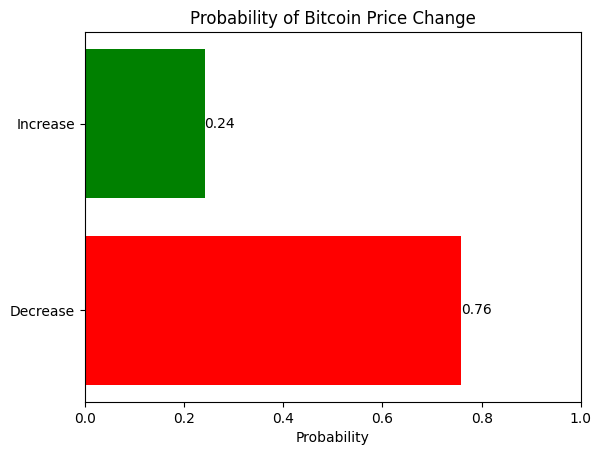

In [17]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [18]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.76
Probability of price increase: 0.24
